# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


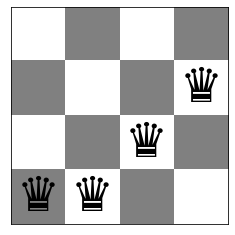

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [57]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


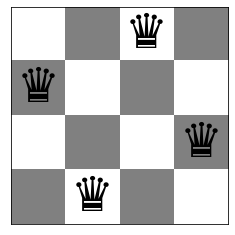

In [58]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

Board with 5 conflicts.


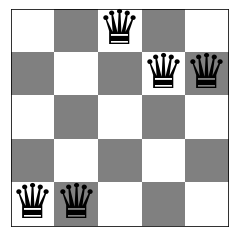

Board with 0 conflicts.


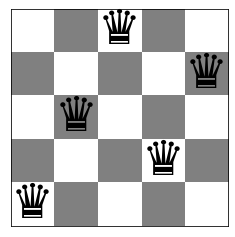

In [59]:
# Code and description go here

def steepAscend(board, max):
    counter = 0
    while conflicts(board) > 0:
        counter += 1
        if counter > max:
            return False
        possibleMoves = {}
        for cols in range(0, len(board)):
            for rows in range(0, len(board)):
                if board[cols] == rows:
                    continue
                copyBoard = np.copy(board)
                copyBoard[cols] = rows
                possibleMoves[(cols, rows)] = conflicts(copyBoard)
        bestMoves = []
        leastAmtConflicts = conflicts(board)

        for first, second in possibleMoves.items():
            if second < leastAmtConflicts:
                leastAmtConflicts = second
        for first, second in possibleMoves.items():
            if second == leastAmtConflicts: 
                bestMoves.append(first)
        if len(bestMoves) > 0:
            col = bestMoves[0][0]
            row = bestMoves[0][1]
            board[col] = row
    return True

steepAscendBoard = random_board(5)
show_board(steepAscendBoard)
steepAscend(steepAscendBoard, 1000)
show_board(steepAscendBoard)

## Task 2: Random Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Board with 7 conflicts.


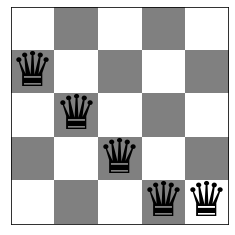

Board with 7 conflicts.


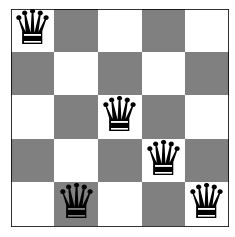

In [60]:
# Code and description go here

import random

def randomHillClimbing(board, max):
    counter = 0
    while conflicts(board) > 0:
        counter += 1
        if counter > max:
            return False
        possibleMoves = {}
        for cols in range(0, len(board)):
            for rows in range(0, len(board)):
                if board[cols] == rows:
                    continue
                copyBoard = np.copy(board)
                copyBoard[cols] = rows
                possibleMoves[(cols, rows)] = conflicts(copyBoard)
        randomMove = random.choice(list(possibleMoves.items()))
        board[randomMove[0][0]] = randomMove[0][1]
    return True

randomHillClimbBoard = random_board(5)
show_board(randomHillClimbBoard)
randomHillClimbing(randomHillClimbBoard, 1000)
show_board(randomHillClimbBoard)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Board with 4 conflicts.


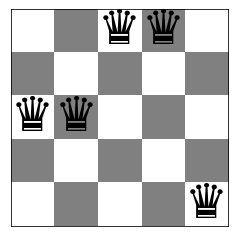

Board with 0 conflicts.


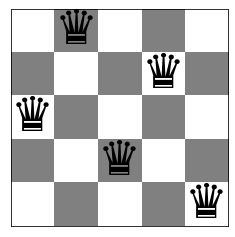

In [61]:
# Code and description go here

def firstChoiceHillClimbing(board, max):
    counter = 0
    while conflicts(board) > 0:
        counter += 1
        if counter > max:
            return False
        leastConflicts = conflicts(board)
        for cols in range(0, len(board)):
            for rows in range(0, len(board)):
                if board[cols] == rows:
                    continue
                copyBoard = np.copy(board)
                copyBoard[cols] = rows
                copyConflicts = conflicts(copyBoard)

                if copyConflicts < leastConflicts:
                    board[cols] = rows
        counter += 1
    return True

firstChoiceHillClimbBoard = random_board(5)
show_board(firstChoiceHillClimbBoard)
firstChoiceHillClimbing(firstChoiceHillClimbBoard, 1000)
show_board(firstChoiceHillClimbBoard)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

Board with 0 conflicts.


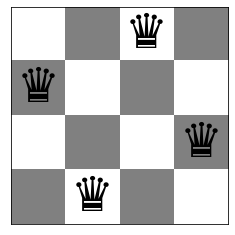

Board with 4 conflicts.


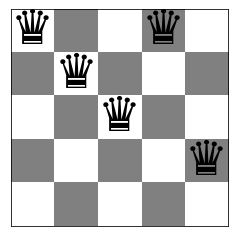

Board with 4 conflicts.


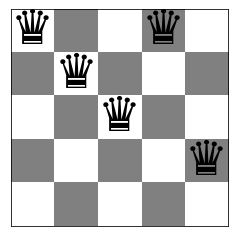

In [62]:
# Code and description go here
def hillClimbRandomRestart(board, max, size):
    bestSteepAscentBoard = np.copy(board)
    bestRandomHillBoard = np.copy(board)
    bestFirstChoiceBoard = np.copy(board)

    for i in range(0, 100):
        randomBoard = random_board(size)
        steepestAscentBoard = np.copy(randomBoard)
        randomHillBoard = np.copy(randomBoard)
        firstChoiceBoard = np.copy(randomBoard)

        steepAscend(steepestAscentBoard, max)
        if conflicts(steepestAscentBoard) == 0:
            return steepestAscentBoard, bestRandomHillBoard, bestFirstChoiceBoard, True
        elif conflicts(steepestAscentBoard) < conflicts(bestSteepAscentBoard):
            bestSteepAscentBoard = np.copy(steepestAscentBoard)
        
        randomHillClimbing(randomHillBoard, max)
        if conflicts(randomHillBoard) == 0:
            return bestSteepAscentBoard, randomHillBoard, bestFirstChoiceBoard, True
        elif conflicts(randomHillBoard) < conflicts(bestRandomHillBoard):
            bestRandomHillBoard = np.copy(randomHillBoard)
        
        steepAscend(firstChoiceBoard, max)
        if conflicts(firstChoiceBoard) == 0:
            return bestSteepAscentBoard, bestRandomHillBoard, firstChoiceBoard, True
        elif conflicts(firstChoiceBoard) < conflicts(bestFirstChoiceBoard):
            bestFirstChoiceBoard = np.copy(firstChoiceBoard)
        
        bestSteepestConflicts = conflicts(bestSteepAscentBoard)
        bestRandomHillConflicts = conflicts(bestRandomHillBoard)
        bestFirstChoiceConflicts = conflicts(bestFirstChoiceBoard)
    
    return bestSteepAscentBoard, bestRandomHillBoard, bestFirstChoiceBoard, bestSteepestConflicts, bestRandomHillConflicts, bestFirstChoiceConflicts

hillClimbRandomRestartBoard = random_board(5)
randomRestartResults = hillClimbRandomRestart(hillClimbRandomRestartBoard, 1000, 4)
for results in randomRestartResults[:-1]:
    show_board(results)
        

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

In [71]:
import time
# Returns time in seconds
import pandas as pd

boardSizes = [3, 5, 8, 10, 12]
results = [['Size', 'Steepest Ascent', 'Random Hill Climb', 'First Choice', 'Random Restart']]
resultsC = [['Size', 'Steepest Ascent', 'Random Hill Climb', 'First Choice', 'Random Restart']]
for size in boardSizes:
    total_steep = 0
    total_random = 0
    total_first = 0
    total_restart = 0

    total_steepC = 0
    total_randomC = 0
    total_firstC = 0
    total_restartC = 0
    
    for i in range(0, 10):

        newBoard = random_board(size)

        t_init = time.time()
        steepAscendBoard2 = np.copy(newBoard)
        steepAscend(steepAscendBoard2, 500)
        t_stop = time.time()
        t_steep = t_stop - t_init
        total_steep += t_steep
        total_steepC += conflicts(steepAscendBoard2)

        t_init2 = time.time()
        randomHillClimbingBoard2 = np.copy(newBoard)
        randomHillClimbing(randomHillClimbingBoard2, 500)
        t_stop2 = time.time()
        t_random = t_stop2 - t_init2
        total_random += t_random
        total_randomC += conflicts(randomHillClimbingBoard2)

        t_init3 = time.time()
        firstChoiceHillClimbingBoard2 = np.copy(newBoard)
        firstChoiceHillClimbing(firstChoiceHillClimbingBoard2, 500)
        t_stop3 = time.time()
        t_first = t_stop3 - t_init3
        total_first += t_first
        total_firstC += conflicts(firstChoiceHillClimbingBoard2)

        t_init4 = time.time()
        hillClimbRandomRestartBoard2 = np.copy(newBoard)
        hillClimbRandomRestart(hillClimbRandomRestartBoard2, 500, size-1)
        t_stop4 = time.time()
        t_restart = t_stop4 - t_init4
        total_restart += t_restart
        total_restartC += conflicts(hillClimbRandomRestartBoard2)

    row = [size, total_steep/10, total_random/10, total_first/10, total_restart/10]
    conflictsRow = [size, total_steepC/10, total_randomC/10, total_firstC/10, total_restart/10]
    results.append(row)
    resultsC.append(conflictsRow)

print(results)

[['Size', 'Steepest Ascent', 'Random Hill Climb', 'First Choice', 'Random Restart'], [3, 0.035999608039855954, 0.032677841186523435, 0.017469334602355956, 3.857939291000366], [5, 0.0006575584411621094, 0.10497355461120605, 0.014699339866638184, 0.0005480289459228515], [8, 0.42441587448120116, 0.5210234880447387, 0.18594906330108643, 0.8434790134429931], [10, 1.0188589572906495, 1.0084818840026855, 0.5077702522277832, 3.9999910831451415], [12, 1.5123690366744995, 1.659365677833557, 0.7514037370681763, 35.014140129089355]]
[12, 1.3, 12.6, 1.2, 35.014140129089355]


      0                1                  2             3               4
0  Size  Steepest Ascent  Random Hill Climb  First Choice  Random Restart
1     3            0.036           0.032678      0.017469        3.857939
2     5         0.000658           0.104974      0.014699        0.000548
3     8         0.424416           0.521023      0.185949        0.843479
4    10         1.018859           1.008482       0.50777        3.999991
5    12         1.512369           1.659366      0.751404        35.01414
      0                1                  2             3               4
0  Size  Steepest Ascent  Random Hill Climb  First Choice  Random Restart
1     3              1.0                1.8           1.0        3.857939
2     5              0.0                1.5           0.2        0.000548
3     8              0.9                8.0           0.9        0.843479
4    10              1.2                9.9           1.7        3.999991
5    12              1.3              

<AxesSubplot:title={'center':'Execution Time for Size 3 N-Queens Problem'}>

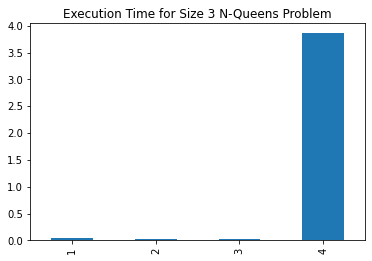

In [78]:
data = pd.DataFrame(results)
dataC = pd.DataFrame(resultsC)
print(data)
print(dataC)

# Plots the execution time for the Size 3 Problem
plt.title('Execution Time for Size 3 N-Queens Problem')
data.iloc[1, 1:].plot(kind="bar")

The plot above shows the Execution Time for a size 3 n-queens problem. The labels 1 through 4 correspond to these labels:
1. Steepest Ascent
2. Random Hill Climb
3. First Choice
4. Random Restart

As shown, with this smallest data set, the Random Restart took the longest by far, and the First Choice took the smallest amount of time. Steepest Ascent and Random Hill Climb both took about the same time.

<AxesSubplot:title={'center':'Execution Time for Size 5 N-Queens Problem'}>

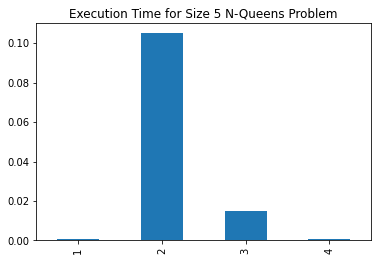

In [77]:
# Plots the execution time for the Size 5 Problem
plt.title('Execution Time for Size 5 N-Queens Problem')
data.iloc[2, 1:].plot(kind="bar")

This plot above (and all plots) have the same x values. Seen here, both Steepest Ascent and Random Restart were extremely quick. The slowest is Random Hill Climb (as expected), and First Choice is not as fast as Steepest Ascent or Random Restart, but is significantly faster than Random Hill.

<AxesSubplot:title={'center':'Execution Time for Size 8 N-Queens Problem'}>

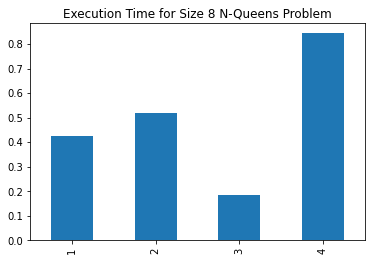

In [79]:
# Plots the execution time for the Size 8 Problem
plt.title('Execution Time for Size 8 N-Queens Problem')
data.iloc[3, 1:].plot(kind="bar")

As shown above, as the size of the data set increases, Random Restart starts to take longer and longer. In fact, in the graph above, it takes the longest, with Random Hill Climb being the second longest. Afterwards, Steepest Ascent is next slowest, and First Choice Hill Climb is the fastest.

<AxesSubplot:title={'center':'Execution Time for Size 10 N-Queens Problem'}>

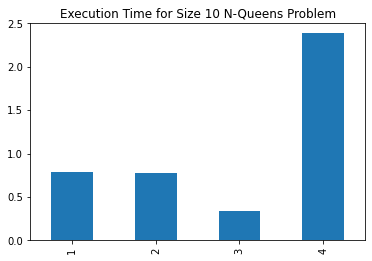

In [67]:
# Plots the execution time for the Size 10 Problem
plt.title('Execution Time for Size 10 N-Queens Problem')
data.iloc[4, 1:].plot(kind="bar")

<AxesSubplot:title={'center':'Execution Time for Size 12 N-Queens Problem'}>

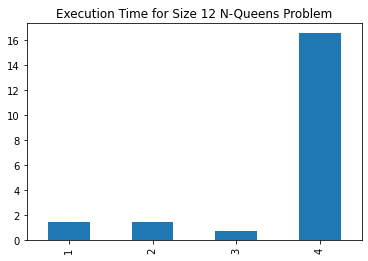

In [68]:
# Plots the execution time for the Size 12 Problem
plt.title('Execution Time for Size 12 N-Queens Problem')
data.iloc[5, 1:].plot(kind="bar")

Again, for the two plots above, Random Restart takes the longest. Random Hill Climb and Steepest Ascent seems to have very similar execution times. As well as this, First Choice continues to be the fastest algorithm to solve the n-queens problem. It seems that for smaller data sets, Random Restart is quite effective and Random Hill Climb seems to be quite ineffective. However, as dataset size increases, Random Restart becomes very slow and so does Random Hill Climbing. First Choice seems to be the best choice on average when it comes to most datasets.

<AxesSubplot:title={'center':'Conflicts for Size 3 N-Queens Problem'}>

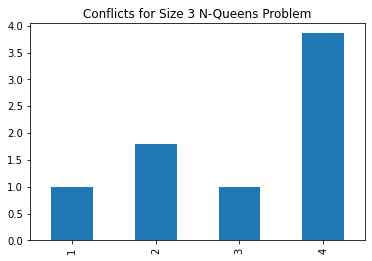

In [86]:
# Plots average conflict for the Size 3 Problem
plt.title('Conflicts for Size 3 N-Queens Problem')
dataC.iloc[1, 1:].plot(kind="bar")

<AxesSubplot:title={'center':'Conflicts for Size 12 N-Queens Problem'}>

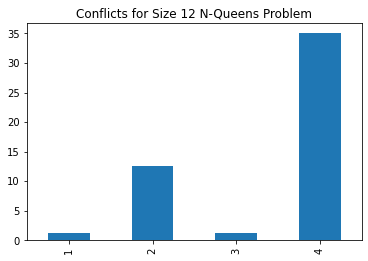

In [87]:
# Plots average conflict for the Size 12 Problem
plt.title('Conflicts for Size 12 N-Queens Problem')
dataC.iloc[5, 1:].plot(kind="bar")

Now, looking at the average conflicts between the size 3 and 12 n-queens problems, we see that average conflicts per each algorithm scales quite similarly. Random Restart has a large amount of conflicts after finishing, with Random Hill Climbing being next. This means that these two, on average, could not find a solution as fast as Steepest Ascent and First Choice Hill Climbing. Both of which minimized the amount of conflicts and found a way to develop a solution most of the time.

## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [69]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [70]:
# Code and description go here